## 현재 컴퓨터에서 사용 중인 메모리를 관리한다.
- 활성 상태 보기 -> 메모리 확인하기

In [1]:
from glob import glob
from datetime import timedelta

from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import os
from glob import glob

# 현재 작업 디렉토리 확인
print("현재 작업 디렉토리:", os.getcwd())

# 일치하는 파일 찾기
matching_files = glob("../*_REVIEWS.csv")

if len(matching_files) == 0:
    print("일치하는 파일을 찾을 수 없습니다.")
else:
    for file in matching_files:
        print("일치하는 파일:", file)


현재 작업 디렉토리: /Users/t2023-m0093/내일배움캠프 - 스파르타코딩클럽
일치하는 파일을 찾을 수 없습니다.


In [3]:
from glob import glob

# 일치하는 파일 찾기
matching_files = glob("/Users/t2023-m0093/내일배움캠프 - 스파르타코딩클럽/*_REVIEWS.csv")

if len(matching_files) == 0:
    print("일치하는 파일을 찾을 수 없습니다.")
else:
    for file in matching_files:
        print("일치하는 파일:", file)


일치하는 파일: /Users/t2023-m0093/내일배움캠프 - 스파르타코딩클럽/WHATSAPP_REVIEWS.csv
일치하는 파일: /Users/t2023-m0093/내일배움캠프 - 스파르타코딩클럽/INSTAGRAM_REVIEWS.csv
일치하는 파일: /Users/t2023-m0093/내일배움캠프 - 스파르타코딩클럽/SPOTIFY_REVIEWS.csv
일치하는 파일: /Users/t2023-m0093/내일배움캠프 - 스파르타코딩클럽/FACEBOOK_REVIEWS.csv
일치하는 파일: /Users/t2023-m0093/내일배움캠프 - 스파르타코딩클럽/TWITTER_REVIEWS.csv
일치하는 파일: /Users/t2023-m0093/내일배움캠프 - 스파르타코딩클럽/FLIPKART_REVIEWS.csv
일치하는 파일: /Users/t2023-m0093/내일배움캠프 - 스파르타코딩클럽/TIKTOK_REVIEWS.csv


In [4]:
def extract_csvs():
    res = []
    for path in tqdm(matching_files):
        app_name = path.split("/")[-1].replace(".csv", "")
        df_temp = pd.read_csv(path)
        df_temp = df_temp.assign(app_name=app_name)
        res.append(df_temp)
    df = pd.concat(res)
    return df

In [5]:
df = extract_csvs()

100%|█████████████████████████████████████████████| 7/7 [00:48<00:00,  7.00s/it]


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28154385 entries, 0 to 3465865
Data columns (total 12 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Unnamed: 0           float64
 1   review_id            object 
 2   pseudo_author_id     object 
 3   author_name          object 
 4   review_text          object 
 5   review_rating        float64
 6   review_likes         int64  
 7   author_app_version   object 
 8   review_timestamp     object 
 9   app_name             object 
 10  author_id            object 
 11  review_datetime_utc  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 2.7+ GB


In [7]:
df.isna().mean()

Unnamed: 0             1.457340e-01
review_id              2.997116e-01
pseudo_author_id       2.997116e-01
author_name            0.000000e+00
review_text            3.398050e-04
review_rating          3.196660e-07
review_likes           0.000000e+00
author_app_version     2.079358e-01
review_timestamp       2.997116e-01
app_name               0.000000e+00
author_id              7.003858e-01
review_datetime_utc    7.002884e-01
dtype: float64

In [8]:
target_columns = [
    "review_id", "app_name",
    "author_name", "pseudo_author_id", "author_app_version",
    "review_rating", "review_likes",
    "review_datetime_utc", "review_timestamp"   
]

In [9]:
df_target = df[target_columns]
df = df_target
del df_target

### 추가 전처리

In [10]:
df.isna().sum()

review_id               8438195
app_name                      0
author_name                   0
pseudo_author_id        8438195
author_app_version      5854305
review_rating                 9
review_likes                  0
review_datetime_utc    19716190
review_timestamp        8438195
dtype: int64

In [11]:
df[df.review_timestamp.notna() & df.review_datetime_utc.notna()]
# 둘 다 채워져 있는 경우는 없다.

,review_id,app_name,author_name,pseudo_author_id,author_app_version,review_rating,review_likes,review_datetime_utc,review_timestamp


In [12]:
if (df.review_timestamp.notna() & df.review_datetime_utc.notna()).sum() > 0:
    raise Exception("review_timestamp와 review_datetime_utc가 동시에 존재합니다")

In [13]:
df.review_timestamp.fillna(df.review_datetime_utc).notna().mean()

1.0

In [14]:
df.review_timestamp.head()

0    2021-11-25 03:12:29
1    2021-11-25 03:12:37
2    2021-11-25 03:12:55
3    2021-11-25 03:12:59
4    2021-11-25 03:12:59
Name: review_timestamp, dtype: object

In [15]:
df.review_datetime_utc.dropna().head()

0    2011-07-08T05:26:10.000Z
1    2011-07-18T15:59:43.000Z
2    2011-08-14T17:12:20.000Z
3    2011-09-03T17:00:18.000Z
4    2011-09-23T09:03:47.000Z
Name: review_datetime_utc, dtype: object

In [16]:
df.review_timestamp = pd.to_datetime(df.review_timestamp)
df.review_datetime_utc = pd.to_datetime(df.review_datetime_utc)
# 형태가 조금씩 다르니 통일해준다.
# 그 다음 둘의 패턴의 차이를 본다.

<Axes: xlabel='review_timestamp'>

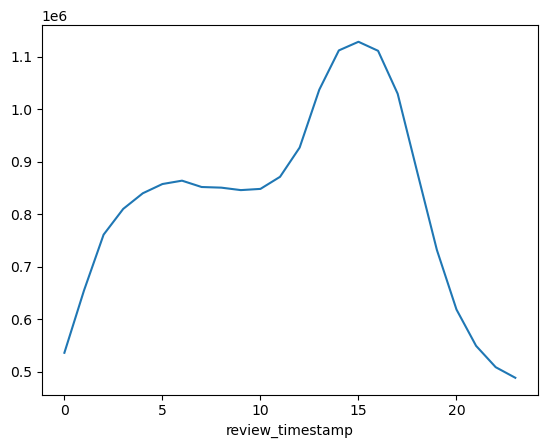

In [17]:
df.review_timestamp.dt.hour.value_counts().sort_index().plot()
# 시간당 발생한 이벤트 수

<Axes: xlabel='review_datetime_utc'>

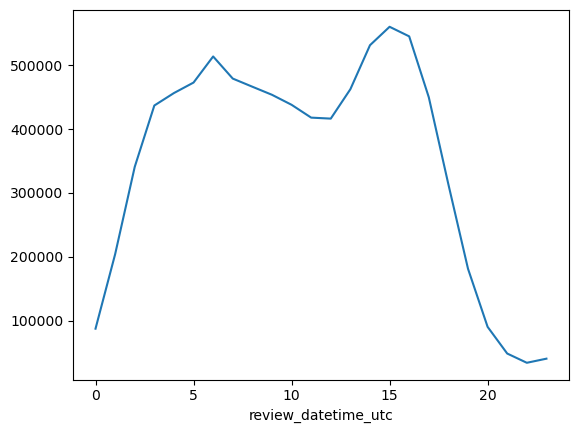

In [18]:
df.review_datetime_utc.dt.hour.value_counts().sort_index().plot()
# 위 그래프와 패턴이 비슷하다.

In [19]:
import matplotlib.pyplot as plt

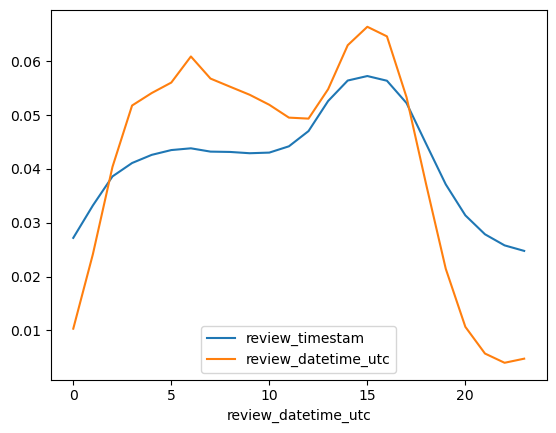

In [20]:
df.review_timestamp.dt.hour.value_counts(normalize=True).sort_index().plot()
df.review_datetime_utc.dt.hour.value_counts(normalize=True).sort_index().plot()
plt.legend(["review_timestam", "review_datetime_utc"])
plt.show()
# 패턴이 아주 조금 차이가 난다.

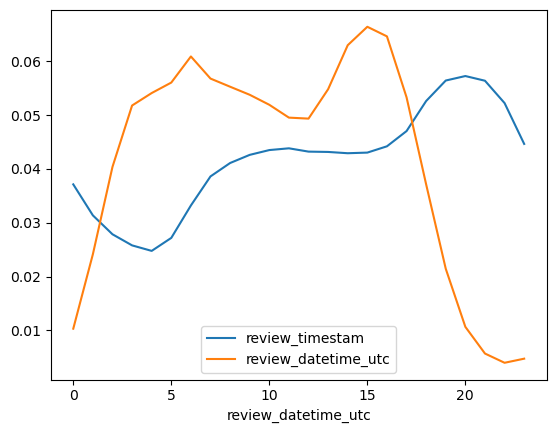

In [21]:
(df.review_timestamp + timedelta(hours=5)).dt.hour.value_counts(normalize=True).sort_index().plot()
df.review_datetime_utc.dt.hour.value_counts(normalize=True).sort_index().plot()
plt.legend(["review_timestam", "review_datetime_utc"])
plt.show()

In [22]:
df.review_timestamp

0         2021-11-25 03:12:29
1         2021-11-25 03:12:37
2         2021-11-25 03:12:55
3         2021-11-25 03:12:59
4         2021-11-25 03:12:59
                  ...        
3465861   2023-11-14 20:38:14
3465862   2023-11-14 20:38:18
3465863   2023-11-14 20:38:20
3465864   2023-11-14 20:38:41
3465865   2023-11-14 20:39:18
Name: review_timestamp, Length: 28154385, dtype: datetime64[ns]

In [23]:
df.review_datetime_utc

0         NaT
1         NaT
2         NaT
3         NaT
4         NaT
           ..
3465861   NaT
3465862   NaT
3465863   NaT
3465864   NaT
3465865   NaT
Name: review_datetime_utc, Length: 28154385, dtype: datetime64[ns, UTC]

In [24]:
# 타임존 정보를 없애서 둘의 데이터 형태를 통일해주자.
df.review_datetime_utc = df.review_datetime_utc.dt.tz_localize(None)
df.review_datetime_utc += timedelta(hours=5)
df.review_timestamp += timedelta(hours=5)

In [25]:
df.review_datetime_utc

0         NaT
1         NaT
2         NaT
3         NaT
4         NaT
           ..
3465861   NaT
3465862   NaT
3465863   NaT
3465864   NaT
3465865   NaT
Name: review_datetime_utc, Length: 28154385, dtype: datetime64[ns]

In [26]:
df.review_timestamp = df.review_timestamp.fillna(df.review_datetime_utc)
df = df.drop('review_datetime_utc',axis=1)

<Axes: xlabel='review_timestamp'>

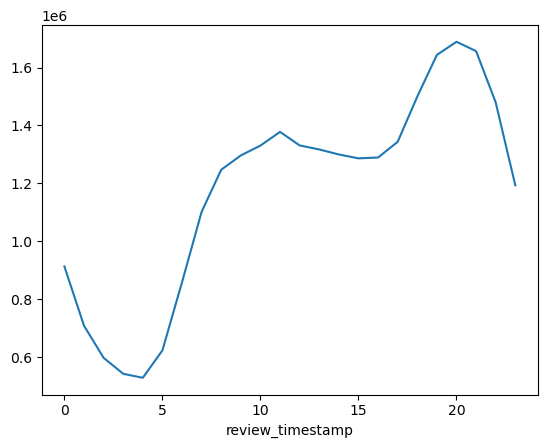

In [27]:
df.review_timestamp.dt.hour.value_counts().sort_index().plot()

In [28]:
df.head()

,review_id,app_name,author_name,pseudo_author_id,author_app_version,review_rating,review_likes,review_timestamp
0,ff27dd54-d785-418f-998c-8c2e01351201,WHATSAPP_REVIEWS,VI*******AR,232289234882626103787,2.21.23.23,5.0,0,2021-11-25 08:12:29
1,08e30530-c0fe-4a94-86d3-cc2ddb08b66b,WHATSAPP_REVIEWS,Ha************an,165667818870073259663,2.21.10.16,5.0,0,2021-11-25 08:12:37
2,f6077a17-bcc3-4445-b23e-15d292f217b9,WHATSAPP_REVIEWS,Ar******77,235241404052650920045,2.21.21.19,1.0,0,2021-11-25 08:12:55
3,6ac91332-f85e-488f-8538-3d50f803f22b,WHATSAPP_REVIEWS,Na************* U,217415827699074437622,2.21.10.16,5.0,0,2021-11-25 08:12:59
4,8eaf12b4-386e-4ca3-a5b4-6dd45e051b54,WHATSAPP_REVIEWS,or*****************ne,326804115988587106741,2.21.22.26,5.0,0,2021-11-25 08:12:59


In [29]:
df.info()
# 데이터가 1.9기가로 줄어들었다.

<class 'pandas.core.frame.DataFrame'>
Index: 28154385 entries, 0 to 3465865
Data columns (total 8 columns):
 #   Column              Dtype         
---  ------              -----         
 0   review_id           object        
 1   app_name            object        
 2   author_name         object        
 3   pseudo_author_id    object        
 4   author_app_version  object        
 5   review_rating       float64       
 6   review_likes        int64         
 7   review_timestamp    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 1.9+ GB


In [30]:
df.to_parquet("./target_raw.parquet")

In [31]:
df.groupby("app_name")["review_rating"].mean()

app_name
FACEBOOK_REVIEWS     3.169134
FLIPKART_REVIEWS     4.322431
INSTAGRAM_REVIEWS    3.931349
SPOTIFY_REVIEWS      4.043836
TIKTOK_REVIEWS       4.276736
TWITTER_REVIEWS      3.835051
WHATSAPP_REVIEWS     3.995535
Name: review_rating, dtype: float64